Saved logo to: coding_for_freedom_logo.png


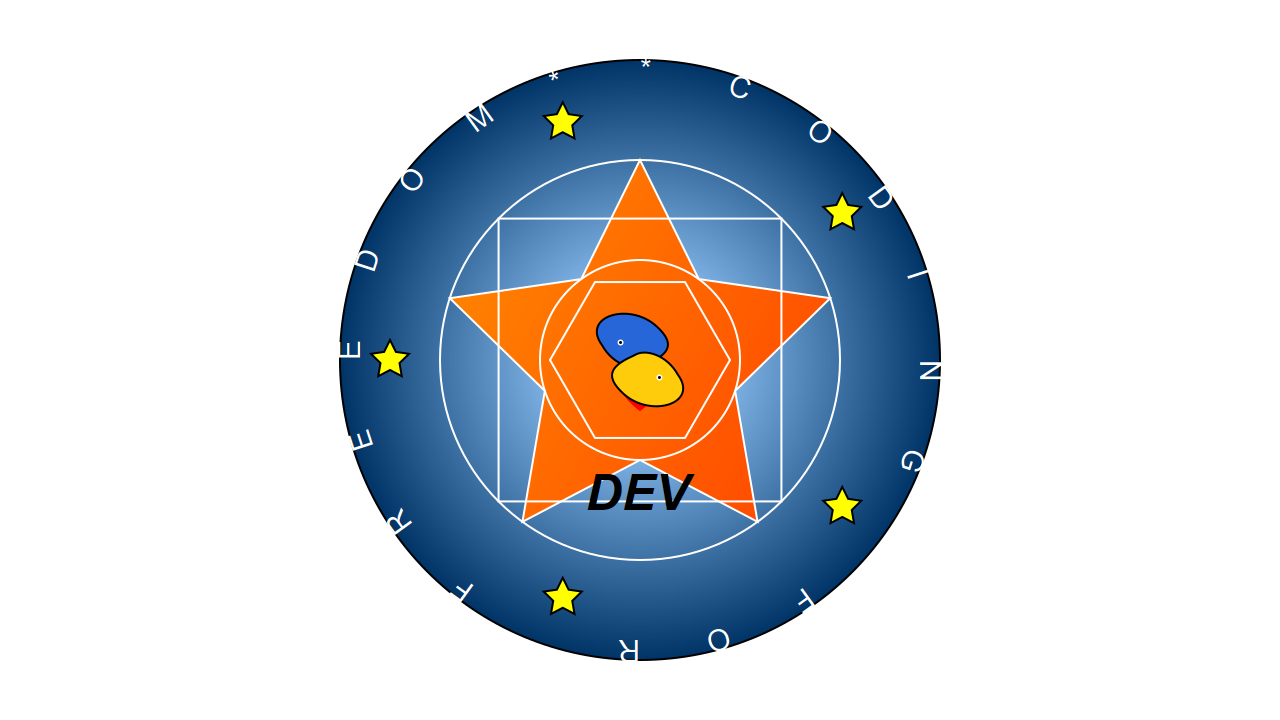

In [1]:
import math
import cairo
import os
import urllib.request
import IPython.display as ipd

# If running in a Jupyter environment this will display the image after creation
try:
    import IPython.display as ipd

except Exception:
    ipd = None

# Parameters
WIDTH, HEIGHT = 1280, 720
surface = cairo.ImageSurface(cairo.Format.ARGB32, WIDTH, HEIGHT)
context = cairo.Context(surface)

# Replaced center text with the Python logo and circular tagline updated
circular_text = "*CODING FOR FREEDOM*"
italic_text = "DEV"

# Background
context.rectangle(0, 0, WIDTH, HEIGHT)
context.set_source_rgb(1, 1, 1)  # White background
context.fill()

# Radial Gradient Circle (Outer Background Circle)
gradient = cairo.RadialGradient(WIDTH / 2, HEIGHT / 2, 50, WIDTH / 2, HEIGHT / 2, 300)
gradient.add_color_stop_rgb(0, 0.6, 0.8, 1)  # Light blue at center
gradient.add_color_stop_rgb(1, 0, 0.2, 0.4)  # Dark blue at edges
context.arc(WIDTH / 2, HEIGHT / 2, 300, 0, 2 * math.pi)
context.set_source(gradient)
context.fill_preserve()
context.set_source_rgb(0, 0, 0)
context.stroke()

# Function to draw a star
def draw_star(context, cx, cy, spikes, outer_radius, inner_radius):
    angle = math.pi / spikes
    context.new_path()
    context.move_to(cx, cy - outer_radius)
    for i in range(2 * spikes + 1):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = cx + math.sin(i * angle) * radius
        y = cy - math.cos(i * angle) * radius
        context.line_to(x, y)
    context.close_path()

# Draw the big star
gradient2 = cairo.LinearGradient(0, 0, WIDTH, HEIGHT)
gradient2.add_color_stop_rgb(0, 1, 0.8, 0) # Yellow
gradient2.add_color_stop_rgb(1, 1, 0, 0) # Red
context.set_source(gradient2)

big_star_outer_radius = 200
big_star_inner_radius = 100

# Use draw_star to place the path then fill
draw_star(context, WIDTH / 2, HEIGHT / 2, 5, big_star_outer_radius, big_star_inner_radius)
context.fill_preserve()
context.set_source_rgb(1, 1, 1)
context.stroke()

# Draw white circle touching the edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_outer_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw inner circle touching the inner edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_inner_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw white square with an outline touching the white circle's circumference
side_length = 2 * big_star_outer_radius / math.sqrt(2)
top_left_x = WIDTH / 2 - side_length / 2
top_left_y = HEIGHT / 2 - side_length / 2
context.rectangle(top_left_x, top_left_y, side_length, side_length)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw small stars around the circle
def draw_small_stars(context, cx, cy, spikes, radius, small_star_outer_radius, small_star_inner_radius):
    angle_step = 2 * math.pi / spikes
    for i in range(spikes):
        angle = i * angle_step + angle_step / 2
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        draw_star(context, x, y, 5, small_star_outer_radius, small_star_inner_radius)
        context.set_source_rgb(1, 1, 0)  # Yellow
        context.fill_preserve()
        context.set_source_rgb(0, 0, 0)  # Black outline
        context.stroke()


draw_small_stars(context, WIDTH / 2, HEIGHT / 2, 5, 250, 20, 10)

# Draw a hexagon (6 sides) inside the innermost circle
def draw_hexagon(context, cx, cy, radius):
    angle_step = 2 * math.pi / 6 # 6 sides for a hexagon
    points = []
    for i in range(6):
        angle = i * angle_step
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        points.append((x, y))
    context.move_to(*points[0])
    for point in points[1:]:
        context.line_to(*point)
    context.close_path()
    context.stroke()

hexagon_radius = big_star_inner_radius - 10  # Slightly smaller to fit inside the circle
context.set_source_rgb(1, 1, 1)  # White color for hexagon stroke
draw_hexagon(context, WIDTH / 2, HEIGHT / 2, hexagon_radius)

# Draw a heart at the center
def draw_heart(context, cx, cy, size):
    context.new_path()
    context.move_to(cx, cy + size * 0.25)
    context.curve_to(cx - size * 0.5, cy - size * 0.5, cx - size, cy + size * 0.5, cx, cy + size * 1.25)
    context.curve_to(cx + size, cy + size * 0.5, cx + size * 0.5, cy - size * 0.5, cx, cy + size * 0.25)
    context.close_path()
    context.fill_preserve()
    context.set_source_rgb(1, 0, 0)  # Red heart
    context.stroke()

heart_size = 40  # Size of the heart in relation to the inner circle
context.set_source_rgb(1, 0, 0)  # Red heart color
# Keep the heart but draw it slightly offset so the Python logo can sit centered
# We'll draw the logo on top of the heart area so the heart remains a subtle accent
draw_heart(context, WIDTH / 2, HEIGHT / 2, heart_size)

# ----- NEW: Draw Python logo in the center (replacing the "Jeremy" text) -----
# This draws a simplified, stylized Python logo composed of two rounded snake shapes

def draw_python_logo(context, cx, cy, size):
    # size is overall diameter; we'll compute component sizes
    w = size
    h = size * 0.9
    offset = size * 0.12

    # Blue top-left snake
    context.new_path()
    # body outline (approximate python logo shape)
    context.move_to(cx - w * 0.35, cy - h * 0.15)
    context.curve_to(cx - w * 0.55, cy - h * 0.45, cx - w * 0.1, cy - h * 0.6, cx + w * 0.15, cy - h * 0.35)
    context.curve_to(cx + w * 0.35, cy - h * 0.15, cx + w * 0.25, cy - h * 0.05, cx + w * 0.05, cy + h * 0.05)
    context.curve_to(cx - w * 0.05, cy + h * 0.12, cx - w * 0.25, cy + h * 0.05, cx - w * 0.35, cy - h * 0.15)
    context.close_path()
    context.set_source_rgb(0.15, 0.4, 0.85)  # Python blue
    context.fill_preserve()
    context.set_source_rgb(0, 0, 0)
    context.set_line_width(2)
    context.stroke()

    # Blue snake eye (white dot)
    eye_x = cx - w * 0.18
    eye_y = cy - h * 0.18
    context.arc(eye_x, eye_y, max(3, size * 0.02), 0, 2 * math.pi)
    context.set_source_rgb(1, 1, 1)
    context.fill()
    context.arc(eye_x, eye_y, max(1.5, size * 0.008), 0, 2 * math.pi)
    context.set_source_rgb(0, 0, 0)
    context.fill()

    # Yellow bottom-right snake (mirrored)
    context.new_path()
    context.move_to(cx + w * 0.35, cy + h * 0.15)
    context.curve_to(cx + w * 0.55, cy + h * 0.45, cx + w * 0.1, cy + h * 0.6, cx - w * 0.15, cy + h * 0.35)
    context.curve_to(cx - w * 0.35, cy + h * 0.15, cx - w * 0.25, cy + h * 0.05, cx - w * 0.05, cy - h * 0.05)
    context.curve_to(cx + w * 0.05, cy - h * 0.12, cx + w * 0.25, cy - h * 0.05, cx + w * 0.35, cy + h * 0.15)
    context.close_path()
    context.set_source_rgb(1.0, 0.8, 0.05)  # Python yellow
    context.fill_preserve()
    context.set_source_rgb(0, 0, 0)
    context.set_line_width(2)
    context.stroke()

    # Yellow snake eye
    eye_x2 = cx + w * 0.18
    eye_y2 = cy + h * 0.18
    context.arc(eye_x2, eye_y2, max(3, size * 0.02), 0, 2 * math.pi)
    context.set_source_rgb(1, 1, 1)
    context.fill()
    context.arc(eye_x2, eye_y2, max(1.5, size * 0.008), 0, 2 * math.pi)
    context.set_source_rgb(0, 0, 0)
    context.fill()

# Draw the Python logo at the center using the hexagon_radius to size it so it fits nicely
python_logo_size = hexagon_radius * 1.2
draw_python_logo(context, WIDTH / 2, HEIGHT / 2, python_logo_size)

# Add italic text (kept as requested)
context.select_font_face("Arial", cairo.FONT_SLANT_ITALIC, cairo.FONT_WEIGHT_BOLD)
context.set_font_size(50)
italic_text_x = (WIDTH - context.text_extents(italic_text)[2]) / 2
italic_text_y = HEIGHT / 2 + 150
context.move_to(italic_text_x, italic_text_y)
context.set_source_rgb(0, 0, 0)
context.show_text(italic_text)

# Circular text function (kept but text changed)
def draw_circular_text(context, text, cx, cy, radius):
    num_chars = len(text)
    if num_chars == 0:
        return
    angle_step = 2 * math.pi / num_chars

    context.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_NORMAL)
    context.set_font_size(30)

    for i, char in enumerate(text):
        angle = i * angle_step - math.pi / 2  # Start from top
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius

        context.save()
        context.translate(x, y)
        context.rotate(angle + math.pi / 2)  # Align with circle
        context.move_to(0, 0)
        context.set_source_rgb(1, 1, 1)  # White text
        context.show_text(char)
        context.restore()

# Use the updated circular text
draw_circular_text(context, circular_text, WIDTH / 2, HEIGHT / 2, 280)

# Save output
output_filename = "coding_for_freedom_logo.png"
surface.write_to_png(output_filename)

if ipd is not None:
    try:
        ipd.Image("coding_for_freedom_logo.png", width=350, height=350, embed=True)

    except Exception:
        display = None

print(f"Saved logo to: {output_filename}")
ipd.Image("coding_for_freedom_logo.png", width=350, height=350, embed=True)



Saved logo to: coding_for_freedom_logo_with_official_python.png


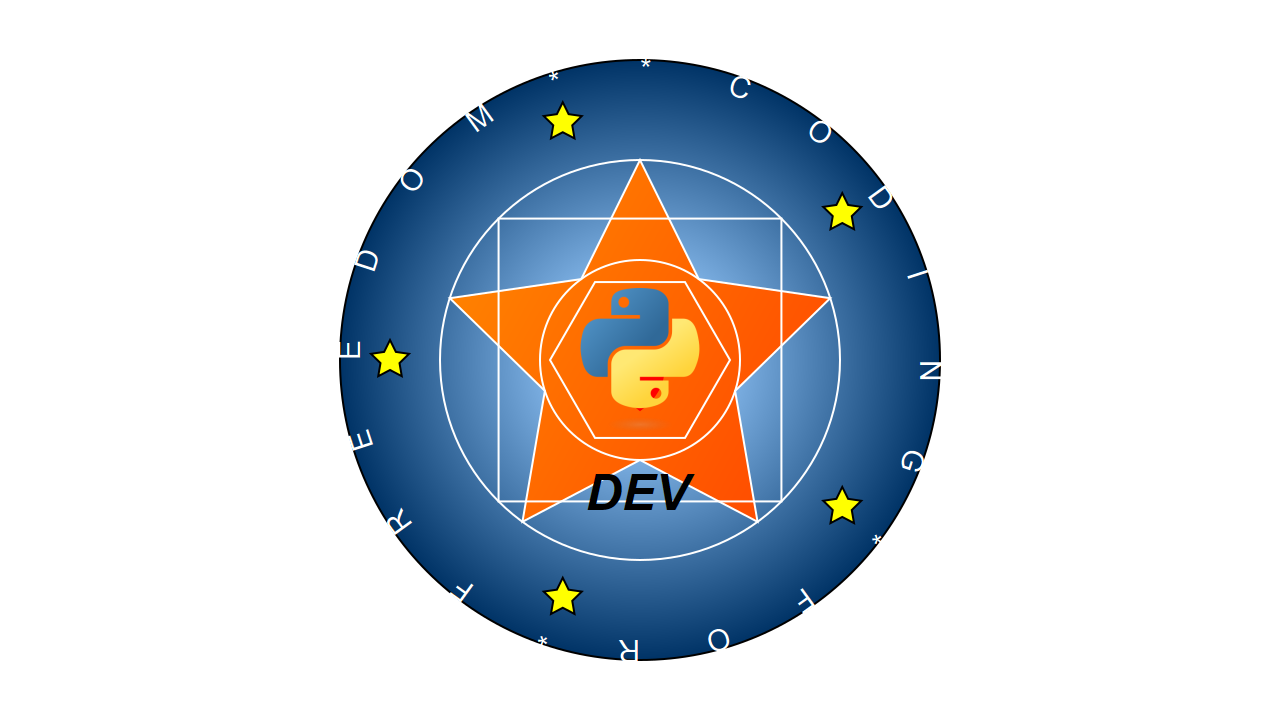

In [2]:
# If running in a Jupyter environment this will display the image after creation
try:
    from IPython import display as ipd
except Exception:
    ipd = None

# Parameters
WIDTH, HEIGHT = 1280, 720
surface = cairo.ImageSurface(cairo.Format.ARGB32, WIDTH, HEIGHT)
context = cairo.Context(surface)

# Updated circular text with asterisks between words
circular_text = "*CODING*FOR*FREEDOM*"
italic_text = "DEV"

# Background
context.rectangle(0, 0, WIDTH, HEIGHT)
context.set_source_rgb(1, 1, 1)  # White background
context.fill()

# Radial Gradient Circle (Outer Background Circle)
gradient = cairo.RadialGradient(WIDTH / 2, HEIGHT / 2, 50, WIDTH / 2, HEIGHT / 2, 300)
gradient.add_color_stop_rgb(0, 0.6, 0.8, 1)  # Light blue at center
gradient.add_color_stop_rgb(1, 0, 0.2, 0.4)  # Dark blue at edges
context.arc(WIDTH / 2, HEIGHT / 2, 300, 0, 2 * math.pi)
context.set_source(gradient)
context.fill_preserve()
context.set_source_rgb(0, 0, 0)
context.stroke()

# Function to draw a star
def draw_star(context, cx, cy, spikes, outer_radius, inner_radius):
    angle = math.pi / spikes
    context.new_path()
    context.move_to(cx, cy - outer_radius)
    for i in range(2 * spikes + 1):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = cx + math.sin(i * angle) * radius
        y = cy - math.cos(i * angle) * radius
        context.line_to(x, y)
    context.close_path()

# Draw the big star
gradient2 = cairo.LinearGradient(0, 0, WIDTH, HEIGHT)
gradient2.add_color_stop_rgb(0, 1, 0.8, 0) # Yellow
gradient2.add_color_stop_rgb(1, 1, 0, 0) # Red
context.set_source(gradient2)

big_star_outer_radius = 200
big_star_inner_radius = 100

# Use draw_star to place the path then fill
draw_star(context, WIDTH / 2, HEIGHT / 2, 5, big_star_outer_radius, big_star_inner_radius)
context.fill_preserve()
context.set_source_rgb(1, 1, 1)
context.stroke()

# Draw white circle touching the edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_outer_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw inner circle touching the inner edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_inner_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw white square with an outline touching the white circle's circumference
side_length = 2 * big_star_outer_radius / math.sqrt(2)
top_left_x = WIDTH / 2 - side_length / 2
top_left_y = HEIGHT / 2 - side_length / 2
context.rectangle(top_left_x, top_left_y, side_length, side_length)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw small stars around the circle
def draw_small_stars(context, cx, cy, spikes, radius, small_star_outer_radius, small_star_inner_radius):
    angle_step = 2 * math.pi / spikes
    for i in range(spikes):
        angle = i * angle_step + angle_step / 2
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        draw_star(context, x, y, 5, small_star_outer_radius, small_star_inner_radius)
        context.set_source_rgb(1, 1, 0)  # Yellow
        context.fill_preserve()
        context.set_source_rgb(0, 0, 0)  # Black outline
        context.stroke()


draw_small_stars(context, WIDTH / 2, HEIGHT / 2, 5, 250, 20, 10)

# Draw a hexagon (6 sides) inside the innermost circle
def draw_hexagon(context, cx, cy, radius):
    angle_step = 2 * math.pi / 6 # 6 sides for a hexagon
    points = []
    for i in range(6):
        angle = i * angle_step
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        points.append((x, y))
    context.move_to(*points[0])
    for point in points[1:]:
        context.line_to(*point)
    context.close_path()
    context.stroke()

hexagon_radius = big_star_inner_radius - 10  # Slightly smaller to fit inside the circle
context.set_source_rgb(1, 1, 1)  # White color for hexagon stroke
draw_hexagon(context, WIDTH / 2, HEIGHT / 2, hexagon_radius)

# Draw a heart at the center
def draw_heart(context, cx, cy, size):
    context.new_path()
    context.move_to(cx, cy + size * 0.25)
    context.curve_to(cx - size * 0.5, cy - size * 0.5, cx - size, cy + size * 0.5, cx, cy + size * 1.25)
    context.curve_to(cx + size, cy + size * 0.5, cx + size * 0.5, cy - size * 0.5, cx, cy + size * 0.25)
    context.close_path()
    context.fill_preserve()
    context.set_source_rgb(1, 0, 0)  # Red heart
    context.stroke()

heart_size = 40  # Size of the heart in relation to the inner circle
context.set_source_rgb(1, 0, 0)  # Red heart color
# Keep the heart but draw it slightly offset so the Python logo can sit centered
draw_heart(context, WIDTH / 2, HEIGHT / 2, heart_size)

# ----- NEW: Fetch and draw the official Python logo in the center (replacing the drawn shape) -----
# We'll try to download the "python-logo-only.png" asset from python.org's official assets.
# Source: https://www.python.org/community/logos/ (PSF trademark applies — make sure your usage follows PSF guidelines)

PYTHON_LOGO_URL = "https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png"
PYTHON_LOGO_LOCAL = "python-logo-only.png"

# Download the logo if not already present
if not os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        print(f"Downloading official Python logo from: {PYTHON_LOGO_URL}")
        urllib.request.urlretrieve(PYTHON_LOGO_URL, PYTHON_LOGO_LOCAL)
        print("Downloaded Python logo to", PYTHON_LOGO_LOCAL)
    except Exception as e:
        print("Failed to download official Python logo:", e)
        PYTHON_LOGO_LOCAL = None

# If we have a local logo file, load and draw it; otherwise fall back to the stylized drawing
if PYTHON_LOGO_LOCAL and os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        logo_surface = cairo.ImageSurface.create_from_png(PYTHON_LOGO_LOCAL)
        lw = logo_surface.get_width()
        lh = logo_surface.get_height()
        # Desired max dimension to fit inside the inner hexagon comfortably
        desired = hexagon_radius * 1.6
        scale = min(desired / lw, desired / lh)

        cx = WIDTH / 2
        cy = HEIGHT / 2

        context.save()
        # Move origin to top-left of where the logo will be drawn
        tx = cx - (lw * scale) / 2
        ty = cy - (lh * scale) / 2
        context.translate(tx, ty)
        context.scale(scale, scale)
        context.set_source_surface(logo_surface, 0, 0)
        context.paint()
        context.restore()
    except Exception as e:
        print("Error drawing downloaded Python logo:", e)
        # fallback: draw the simple python logo shape
        def draw_python_logo_fallback(context, cx, cy, size):
            w = size
            h = size * 0.9
            context.new_path()
            context.move_to(cx - w * 0.35, cy - h * 0.15)
            context.curve_to(cx - w * 0.55, cy - h * 0.45, cx - w * 0.1, cy - h * 0.6, cx + w * 0.15, cy - h * 0.35)
            context.curve_to(cx + w * 0.35, cy - h * 0.15, cx + w * 0.25, cy - h * 0.05, cx + w * 0.05, cy + h * 0.05)
            context.curve_to(cx - w * 0.05, cy + h * 0.12, cx - w * 0.25, cy + h * 0.05, cx - w * 0.35, cy - h * 0.15)
            context.close_path()
            context.set_source_rgb(0.15, 0.4, 0.85)
            context.fill_preserve()
            context.set_source_rgb(0,0,0)
            context.set_line_width(2)
            context.stroke()
        draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, hexagon_radius*1.2)
else:
    # No logo file available — draw fallback
    def draw_python_logo_fallback(context, cx, cy, size):
        w = size
        h = size * 0.9
        context.new_path()
        context.move_to(cx - w * 0.35, cy - h * 0.15)
        context.curve_to(cx - w * 0.55, cy - h * 0.45, cx - w * 0.1, cy - h * 0.6, cx + w * 0.15, cy - h * 0.35)
        context.curve_to(cx + w * 0.35, cy - h * 0.15, cx + w * 0.25, cy - h * 0.05, cx + w * 0.05, cy + h * 0.05)
        context.curve_to(cx - w * 0.05, cy + h * 0.12, cx - w * 0.25, cy + h * 0.05, cx - w * 0.35, cy - h * 0.15)
        context.close_path()
        context.set_source_rgb(0.15, 0.4, 0.85)
        context.fill_preserve()
        context.set_source_rgb(0,0,0)
        context.set_line_width(2)
        context.stroke()
    draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, hexagon_radius*1.2)

# Add italic text (kept as requested)
context.select_font_face("Arial", cairo.FONT_SLANT_ITALIC, cairo.FONT_WEIGHT_BOLD)
context.set_font_size(50)
italic_text_x = (WIDTH - context.text_extents(italic_text)[2]) / 2
italic_text_y = HEIGHT / 2 + 150
context.move_to(italic_text_x, italic_text_y)
context.set_source_rgb(0, 0, 0)
context.show_text(italic_text)

# Circular text function (kept but will use updated circular_text)
def draw_circular_text(context, text, cx, cy, radius):
    num_chars = len(text)
    if num_chars == 0:
        return
    angle_step = 2 * math.pi / num_chars

    context.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_NORMAL)
    context.set_font_size(30)

    for i, char in enumerate(text):
        angle = i * angle_step - math.pi / 2  # Start from top
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius

        context.save()
        context.translate(x, y)
        context.rotate(angle + math.pi / 2)  # Align with circle
        context.move_to(0, 0)
        context.set_source_rgb(1, 1, 1)  # White text
        context.show_text(char)
        context.restore()

# Use the updated circular text
draw_circular_text(context, circular_text, WIDTH / 2, HEIGHT / 2, 280)
    
# Save output
output_filename = "coding_for_freedom_logo_with_official_python.png"
surface.write_to_png(output_filename)

if ipd is not None:
    try:
        display = ipd.Image("coding_for_freedom_logo_with_official_python.png", width=350, height=350, embed=True)

    except Exception:
        display = None

print(f"Saved logo to: {output_filename}")
ipd.Image("coding_for_freedom_logo_with_official_python.png", width=350, height=350, embed=True)




Saved logo to: coding_for_freedom_logo_hexagon_center.png


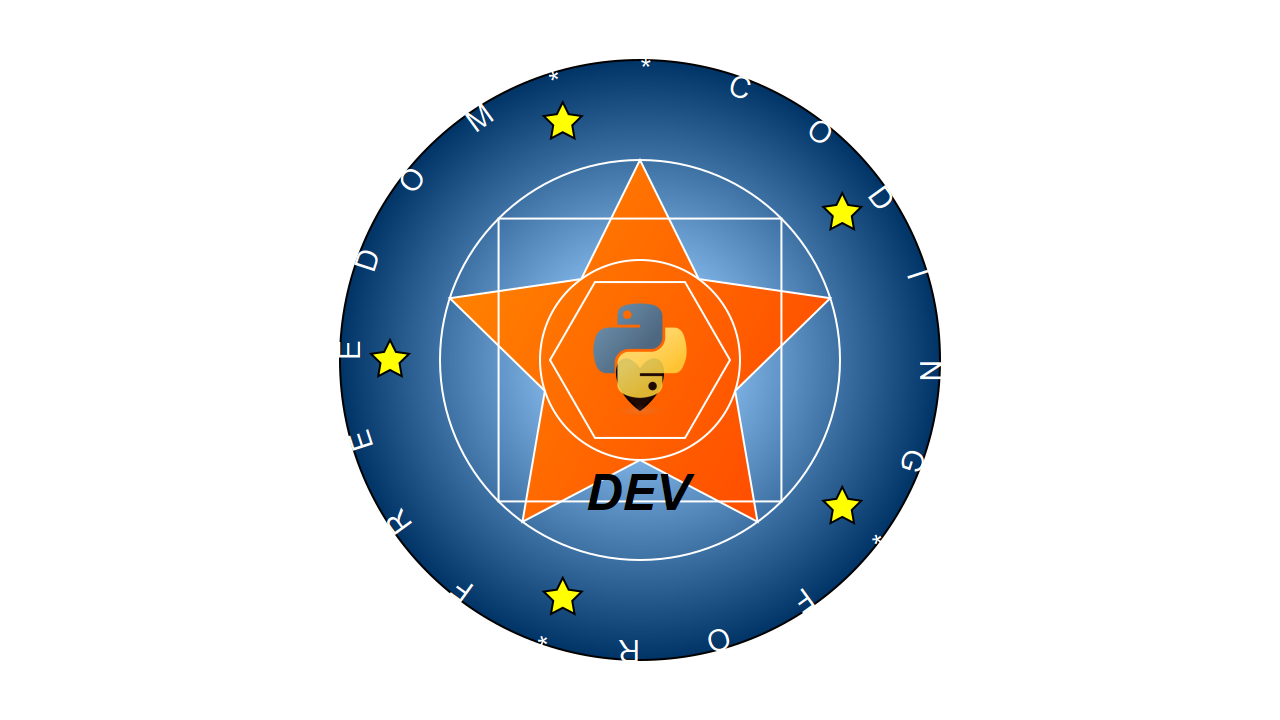

In [3]:
# If running in a Jupyter environment this will display the image after creation
try:
    from IPython import display as ipd
except Exception:
    ipd = None

# Parameters
WIDTH, HEIGHT = 1280, 720
surface = cairo.ImageSurface(cairo.Format.ARGB32, WIDTH, HEIGHT)
context = cairo.Context(surface)

# Updated circular text with asterisks between words
circular_text = "*CODING*FOR*FREEDOM*"
italic_text = "DEV"

# Background
context.rectangle(0, 0, WIDTH, HEIGHT)
context.set_source_rgb(1, 1, 1)  # White background
context.fill()

# Radial Gradient Circle (Outer Background Circle)
gradient = cairo.RadialGradient(WIDTH / 2, HEIGHT / 2, 50, WIDTH / 2, HEIGHT / 2, 300)
gradient.add_color_stop_rgb(0, 0.6, 0.8, 1)  # Light blue at center
gradient.add_color_stop_rgb(1, 0, 0.2, 0.4)  # Dark blue at edges
context.arc(WIDTH / 2, HEIGHT / 2, 300, 0, 2 * math.pi)
context.set_source(gradient)
context.fill_preserve()
context.set_source_rgb(0, 0, 0)
context.stroke()

# Function to draw a star
def draw_star(context, cx, cy, spikes, outer_radius, inner_radius):
    angle = math.pi / spikes
    context.new_path()
    context.move_to(cx, cy - outer_radius)
    for i in range(2 * spikes + 1):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = cx + math.sin(i * angle) * radius
        y = cy - math.cos(i * angle) * radius
        context.line_to(x, y)
    context.close_path()

# Draw the big star
gradient2 = cairo.LinearGradient(0, 0, WIDTH, HEIGHT)
gradient2.add_color_stop_rgb(0, 1, 0.8, 0) # Yellow
gradient2.add_color_stop_rgb(1, 1, 0, 0) # Red
context.set_source(gradient2)

big_star_outer_radius = 200
big_star_inner_radius = 100

# Use draw_star to place the path then fill
draw_star(context, WIDTH / 2, HEIGHT / 2, 5, big_star_outer_radius, big_star_inner_radius)
context.fill_preserve()
context.set_source_rgb(1, 1, 1)
context.stroke()

# Draw white circle touching the edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_outer_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw inner circle touching the inner edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_inner_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw white square with an outline touching the white circle's circumference
side_length = 2 * big_star_outer_radius / math.sqrt(2)
top_left_x = WIDTH / 2 - side_length / 2
top_left_y = HEIGHT / 2 - side_length / 2
context.rectangle(top_left_x, top_left_y, side_length, side_length)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw small stars around the circle
def draw_small_stars(context, cx, cy, spikes, radius, small_star_outer_radius, small_star_inner_radius):
    angle_step = 2 * math.pi / spikes
    for i in range(spikes):
        angle = i * angle_step + angle_step / 2
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        draw_star(context, x, y, 5, small_star_outer_radius, small_star_inner_radius)
        context.set_source_rgb(1, 1, 0)  # Yellow
        context.fill_preserve()
        context.set_source_rgb(0, 0, 0)  # Black outline
        context.stroke()


draw_small_stars(context, WIDTH / 2, HEIGHT / 2, 5, 250, 20, 10)

# Draw inner hexagon (6 sides) inside the innermost circle — keep original polygon
def draw_hexagon(context, cx, cy, radius):
    angle_step = 2 * math.pi / 6 # 6 sides for a hexagon
    points = []
    for i in range(6):
        angle = i * angle_step
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        points.append((x, y))
    context.move_to(*points[0])
    for point in points[1:]:
        context.line_to(*point)
    context.close_path()
    context.stroke()

hexagon_radius = big_star_inner_radius - 10  # Slightly smaller to fit inside the circle
context.set_source_rgb(1, 1, 1)  # White color for hexagon stroke
draw_hexagon(context, WIDTH / 2, HEIGHT / 2, hexagon_radius)

# Draw a heart at the center (dark and semi-transparent so it shows through the logo)
def draw_heart(context, cx, cy, size, fill_alpha=0.95):
    context.new_path()
    context.move_to(cx, cy + size * 0.25)
    context.curve_to(cx - size * 0.5, cy - size * 0.5, cx - size, cy + size * 0.5, cx, cy + size * 1.25)
    context.curve_to(cx + size, cy + size * 0.5, cx + size * 0.5, cy - size * 0.5, cx, cy + size * 0.25)
    context.close_path()
    # Thick dark fill with high alpha so it's visibly strong but still lets logo transparency show through
    context.set_source_rgba(0.08, 0.02, 0.02, fill_alpha)  # very dark maroon with strong opacity
    context.fill_preserve()
    # Stroke with opaque edge for definition
    context.set_source_rgba(0.04, 0.01, 0.01, 1.0)
    context.set_line_width(2)
    context.stroke()

heart_size = 40  # Size of the heart in relation to the inner circle
# Draw the heart first so it's behind the logo
draw_heart(context, WIDTH / 2, HEIGHT / 2, heart_size, fill_alpha=0.95)

# ----- Fetch and draw the official Python logo in the center (positioned proportionally inside the hexagon) -----
# We'll try to download the "python-logo-only.png" asset from python.org's official assets.
PYTHON_LOGO_URL = "https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png"
PYTHON_LOGO_LOCAL = "python-logo-only.png"

# Download the logo if not already present
if not os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        print(f"Downloading official Python logo from: {PYTHON_LOGO_URL}")
        urllib.request.urlretrieve(PYTHON_LOGO_URL, PYTHON_LOGO_LOCAL)
        print("Downloaded Python logo to", PYTHON_LOGO_LOCAL)
    except Exception as e:
        print("Failed to download official Python logo:", e)
        PYTHON_LOGO_LOCAL = None

# Helper: draw a surface centered at cx,cy with maximum size 'desired' while preserving aspect ratio
def draw_surface_centered(context, surface, cx, cy, desired_max_dim, alpha=0.85):
    lw = surface.get_width()
    lh = surface.get_height()
    scale = min(desired_max_dim / lw, desired_max_dim / lh)
    tx = cx - (lw * scale) / 2
    ty = cy - (lh * scale) / 2
    context.save()
    context.translate(tx, ty)
    context.scale(scale, scale)
    context.set_source_surface(surface, 0, 0)
    # paint_with_alpha lets underlying heart show through where the source is transparent
    context.paint_with_alpha(alpha)
    context.restore()

# For a hexagon with circumradius R, the inradius = R * cos(pi/6) (cos(30deg)=~0.866)
inradius = hexagon_radius * math.cos(math.pi / 6)
# choose a desired logo max dimension to fit comfortably inside the hexagon's inradius
desired_logo_max = inradius * 1.45
logo_alpha = 0.85  # Slight translucency so the dark heart is visible through the logo

if PYTHON_LOGO_LOCAL and os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        logo_surface = cairo.ImageSurface.create_from_png(PYTHON_LOGO_LOCAL)
        draw_surface_centered(context, logo_surface, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
    except Exception as e:
        print("Error drawing downloaded Python logo:", e)
        # fallback: draw a simplified python mark with alpha
        def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
            w = size
            h = size * 0.9
            context.save()
            context.translate(cx - w/2, cy - h/2)
            # blue shape
            context.new_path()
            context.move_to(w * 0.15, h * 0.25)
            context.curve_to(-w * 0.1, -h * 0.05, w * 0.05, -h * 0.2, w * 0.45, -h * 0.05)
            context.close_path()
            context.set_source_rgba(0.15, 0.4, 0.85, alpha)
            context.fill_preserve()
            context.set_source_rgba(0,0,0,alpha)
            context.set_line_width(2)
            context.stroke()
            context.restore()
        draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
else:
    # No logo file available — draw fallback with alpha so heart shows
    def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
        w = size
        h = size * 0.9
        context.save()
        context.translate(cx - w/2, cy - h/2)
        # Blue rounded blob
        context.new_path()
        context.arc(w*0.3, h*0.3, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(0.15,0.4,0.85,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        # Yellow rounded blob
        context.new_path()
        context.arc(w*0.7, h*0.7, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(1.0,0.8,0.05,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        context.restore()
    draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)

# Add italic text (kept as requested)
context.select_font_face("Arial", cairo.FONT_SLANT_ITALIC, cairo.FONT_WEIGHT_BOLD)
context.set_font_size(50)
italic_text_x = (WIDTH - context.text_extents(italic_text)[2]) / 2
italic_text_y = HEIGHT / 2 + 150
context.move_to(italic_text_x, italic_text_y)
context.set_source_rgb(0, 0, 0)
context.show_text(italic_text)

# Circular text function (kept but will use updated circular_text)
def draw_circular_text(context, text, cx, cy, radius):
    num_chars = len(text)
    if num_chars == 0:
        return
    angle_step = 2 * math.pi / num_chars

    context.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_NORMAL)
    context.set_font_size(30)

    for i, char in enumerate(text):
        angle = i * angle_step - math.pi / 2  # Start from top
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius

        context.save()
        context.translate(x, y)
        context.rotate(angle + math.pi / 2)  # Align with circle
        context.move_to(0, 0)
        context.set_source_rgb(1, 1, 1)  # White text
        context.show_text(char)
        context.restore()

# Use the updated circular text
draw_circular_text(context, circular_text, WIDTH / 2, HEIGHT / 2, 280)
    
# Save output
output_filename = "coding_for_freedom_logo_hexagon_center.png"
surface.write_to_png(output_filename)

if ipd is not None:
    try:
        display = ipd.Image(output_filename)
    except Exception:
        display = None

print(f"Saved logo to: {output_filename}")
ipd.Image("coding_for_freedom_logo_hexagon_center.png", width=350, height=350, embed=True)



Saved logo to: coding_for_freedom_logo_thicker_circular_text.png


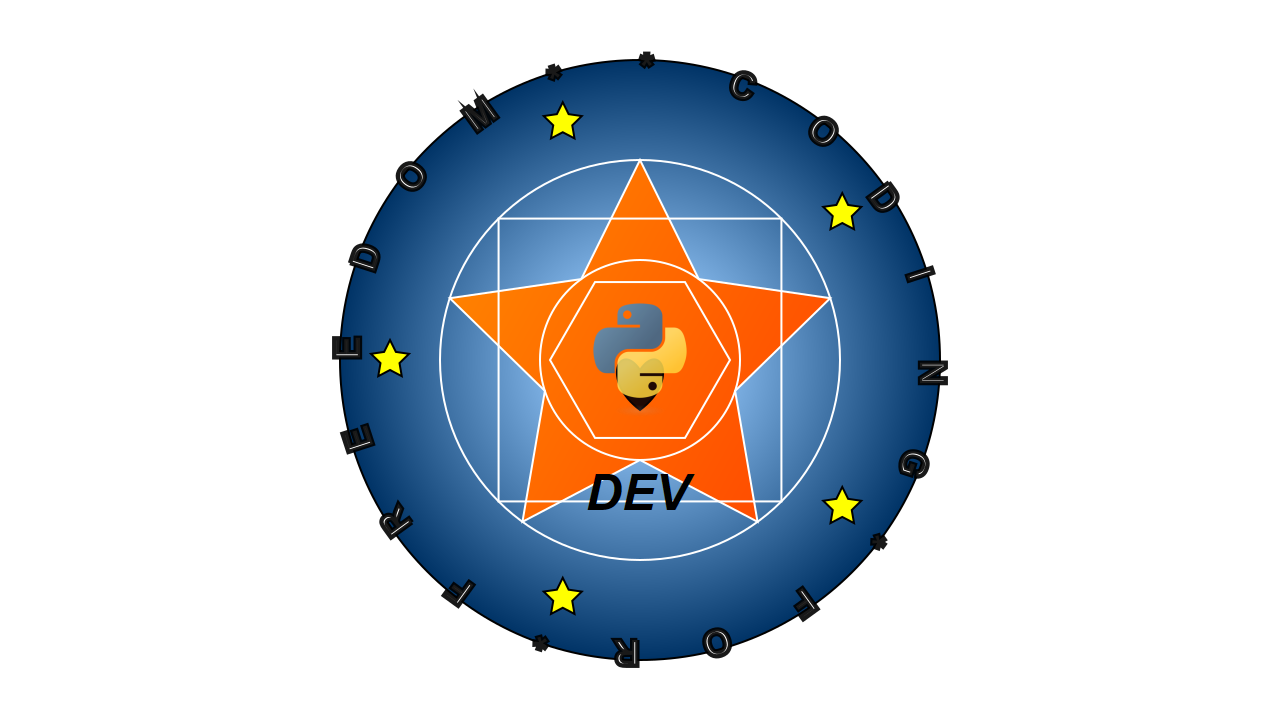

In [4]:
# If running in a Jupyter environment this will display the image after creation
try:
    from IPython import display as ipd
except Exception:
    ipd = None

# Parameters
WIDTH, HEIGHT = 1280, 720
surface = cairo.ImageSurface(cairo.Format.ARGB32, WIDTH, HEIGHT)
context = cairo.Context(surface)

# Updated circular text with asterisks between words
circular_text = "*CODING*FOR*FREEDOM*"
italic_text = "DEV"

# Background
context.rectangle(0, 0, WIDTH, HEIGHT)
context.set_source_rgb(1, 1, 1)  # White background
context.fill()

# Radial Gradient Circle (Outer Background Circle)
gradient = cairo.RadialGradient(WIDTH / 2, HEIGHT / 2, 50, WIDTH / 2, HEIGHT / 2, 300)
gradient.add_color_stop_rgb(0, 0.6, 0.8, 1)  # Light blue at center
gradient.add_color_stop_rgb(1, 0, 0.2, 0.4)  # Dark blue at edges
context.arc(WIDTH / 2, HEIGHT / 2, 300, 0, 2 * math.pi)
context.set_source(gradient)
context.fill_preserve()
context.set_source_rgb(0, 0, 0)
context.stroke()

# Function to draw a star
def draw_star(context, cx, cy, spikes, outer_radius, inner_radius):
    angle = math.pi / spikes
    context.new_path()
    context.move_to(cx, cy - outer_radius)
    for i in range(2 * spikes + 1):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = cx + math.sin(i * angle) * radius
        y = cy - math.cos(i * angle) * radius
        context.line_to(x, y)
    context.close_path()

# Draw the big star
gradient2 = cairo.LinearGradient(0, 0, WIDTH, HEIGHT)
gradient2.add_color_stop_rgb(0, 1, 0.8, 0) # Yellow
gradient2.add_color_stop_rgb(1, 1, 0, 0) # Red
context.set_source(gradient2)

big_star_outer_radius = 200
big_star_inner_radius = 100

# Use draw_star to place the path then fill
draw_star(context, WIDTH / 2, HEIGHT / 2, 5, big_star_outer_radius, big_star_inner_radius)
context.fill_preserve()
context.set_source_rgb(1, 1, 1)
context.stroke()

# Draw white circle touching the edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_outer_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw inner circle touching the inner edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_inner_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw white square with an outline touching the white circle's circumference
side_length = 2 * big_star_outer_radius / math.sqrt(2)
top_left_x = WIDTH / 2 - side_length / 2
top_left_y = HEIGHT / 2 - side_length / 2
context.rectangle(top_left_x, top_left_y, side_length, side_length)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw small stars around the circle
def draw_small_stars(context, cx, cy, spikes, radius, small_star_outer_radius, small_star_inner_radius):
    angle_step = 2 * math.pi / spikes
    for i in range(spikes):
        angle = i * angle_step + angle_step / 2
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        draw_star(context, x, y, 5, small_star_outer_radius, small_star_inner_radius)
        context.set_source_rgb(1, 1, 0)  # Yellow
        context.fill_preserve()
        context.set_source_rgb(0, 0, 0)  # Black outline
        context.stroke()


draw_small_stars(context, WIDTH / 2, HEIGHT / 2, 5, 250, 20, 10)

# Draw inner hexagon (6 sides) inside the innermost circle — keep original polygon
def draw_hexagon(context, cx, cy, radius):
    angle_step = 2 * math.pi / 6 # 6 sides for a hexagon
    points = []
    for i in range(6):
        angle = i * angle_step
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        points.append((x, y))
    context.move_to(*points[0])
    for point in points[1:]:
        context.line_to(*point)
    context.close_path()
    context.stroke()

hexagon_radius = big_star_inner_radius - 10  # Slightly smaller to fit inside the circle
context.set_source_rgb(1, 1, 1)  # White color for hexagon stroke
draw_hexagon(context, WIDTH / 2, HEIGHT / 2, hexagon_radius)

# Draw a heart at the center (dark and semi-transparent so it shows through the logo)
def draw_heart(context, cx, cy, size, fill_alpha=0.95):
    context.new_path()
    context.move_to(cx, cy + size * 0.25)
    context.curve_to(cx - size * 0.5, cy - size * 0.5, cx - size, cy + size * 0.5, cx, cy + size * 1.25)
    context.curve_to(cx + size, cy + size * 0.5, cx + size * 0.5, cy - size * 0.5, cx, cy + size * 0.25)
    context.close_path()
    # Thick dark fill with high alpha so it's visibly strong but still lets logo transparency show through
    context.set_source_rgba(0.08, 0.02, 0.02, fill_alpha)  # very dark maroon with strong opacity
    context.fill_preserve()
    # Stroke with opaque edge for definition
    context.set_source_rgba(0.04, 0.01, 0.01, 1.0)
    context.set_line_width(2)
    context.stroke()

heart_size = 40  # Size of the heart in relation to the inner circle
# Draw the heart first so it's behind the logo
draw_heart(context, WIDTH / 2, HEIGHT / 2, heart_size, fill_alpha=0.95)

# ----- Fetch and draw the official Python logo in the center (positioned proportionally inside the hexagon) -----
# We'll try to download the "python-logo-only.png" asset from python.org's official assets.
PYTHON_LOGO_URL = "https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png"
PYTHON_LOGO_LOCAL = "python-logo-only.png"

# Download the logo if not already present
if not os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        print(f"Downloading official Python logo from: {PYTHON_LOGO_URL}")
        urllib.request.urlretrieve(PYTHON_LOGO_URL, PYTHON_LOGO_LOCAL)
        print("Downloaded Python logo to", PYTHON_LOGO_LOCAL)
    except Exception as e:
        print("Failed to download official Python logo:", e)
        PYTHON_LOGO_LOCAL = None

# Helper: draw a surface centered at cx,cy with maximum size 'desired' while preserving aspect ratio
def draw_surface_centered(context, surface, cx, cy, desired_max_dim, alpha=0.85):
    lw = surface.get_width()
    lh = surface.get_height()
    scale = min(desired_max_dim / lw, desired_max_dim / lh)
    tx = cx - (lw * scale) / 2
    ty = cy - (lh * scale) / 2
    context.save()
    context.translate(tx, ty)
    context.scale(scale, scale)
    context.set_source_surface(surface, 0, 0)
    # paint_with_alpha lets underlying heart show through where the source is transparent
    context.paint_with_alpha(alpha)
    context.restore()

# For a hexagon with circumradius R, the inradius = R * cos(pi/6) (cos(30deg)=~0.866)
inradius = hexagon_radius * math.cos(math.pi / 6)
# choose a desired logo max dimension to fit comfortably inside the hexagon's inradius
desired_logo_max = inradius * 1.45
logo_alpha = 0.85  # Slight translucency so the dark heart is visible through the logo

if PYTHON_LOGO_LOCAL and os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        logo_surface = cairo.ImageSurface.create_from_png(PYTHON_LOGO_LOCAL)
        draw_surface_centered(context, logo_surface, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
    except Exception as e:
        print("Error drawing downloaded Python logo:", e)
        # fallback: draw a simplified python mark with alpha
        def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
            w = size
            h = size * 0.9
            context.save()
            context.translate(cx - w/2, cy - h/2)
            # blue shape
            context.new_path()
            context.move_to(w * 0.15, h * 0.25)
            context.curve_to(-w * 0.1, -h * 0.05, w * 0.05, -h * 0.2, w * 0.45, -h * 0.05)
            context.close_path()
            context.set_source_rgba(0.15, 0.4, 0.85, alpha)
            context.fill_preserve()
            context.set_source_rgba(0,0,0,alpha)
            context.set_line_width(2)
            context.stroke()
            context.restore()
        draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
else:
    # No logo file available — draw fallback with alpha so heart shows
    def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
        w = size
        h = size * 0.9
        context.save()
        context.translate(cx - w/2, cy - h/2)
        # Blue rounded blob
        context.new_path()
        context.arc(w*0.3, h*0.3, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(0.15,0.4,0.85,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        # Yellow rounded blob
        context.new_path()
        context.arc(w*0.7, h*0.7, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(1.0,0.8,0.05,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        context.restore()
    draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)

# Add italic text (kept as requested)
context.select_font_face("Arial", cairo.FONT_SLANT_ITALIC, cairo.FONT_WEIGHT_BOLD)
context.set_font_size(50)
italic_text_x = (WIDTH - context.text_extents(italic_text)[2]) / 2
italic_text_y = HEIGHT / 2 + 150
context.move_to(italic_text_x, italic_text_y)
context.set_source_rgb(0, 0, 0)
context.show_text(italic_text)

# Circular text function (updated to render thicker text by stroking the text path)
def draw_circular_text(context, text, cx, cy, radius):
    num_chars = len(text)
    if num_chars == 0:
        return
    angle_step = 2 * math.pi / num_chars

    # Increase base font size for better visibility
    base_font_size = 36
    context.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_BOLD)
    context.set_font_size(base_font_size)

    # Stroke width proportional to font size for consistent boldness
    stroke_width = max(1.5, base_font_size * 0.12)

    for i, char in enumerate(text):
        angle = i * angle_step - math.pi / 2  # Start from top
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius

        context.save()
        context.translate(x, y)
        context.rotate(angle + math.pi / 2)  # Align with circle
        # Create text path for character
        context.move_to(0, 0)
        context.text_path(char)
        # Fill the text (white)
        context.set_source_rgb(1, 1, 1)
        context.fill_preserve()
        # Stroke the text with a thin dark outline to improve contrast
        context.set_line_width(stroke_width)
        context.set_source_rgba(0, 0, 0, 0.9)
        context.stroke()
        context.restore()

# Use the updated circular text
draw_circular_text(context, circular_text, WIDTH / 2, HEIGHT / 2, 280)
    
# Save output
output_filename = "coding_for_freedom_logo_thicker_circular_text.png"
surface.write_to_png(output_filename)

if ipd is not None:
    try:
        display = ipd.Image(output_filename)
    except Exception:
        display = None

print(f"Saved logo to: {output_filename}")
ipd.Image("coding_for_freedom_logo_thicker_circular_text.png", width=350, height=350, embed=True)



Saved logo to: coding_for_freedom_logo_thicker_circular_text_v2.png


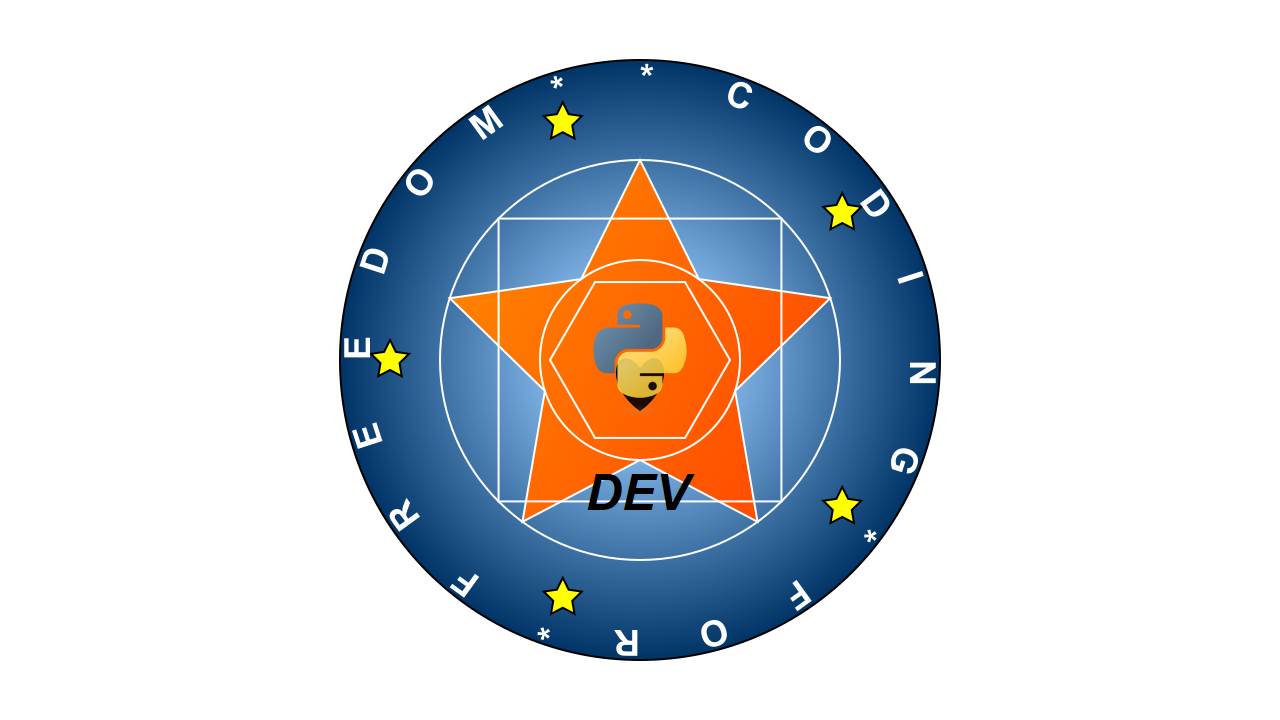

In [5]:
# If running in a Jupyter environment this will display the image after creation
try:
    from IPython import display as ipd
except Exception:
    ipd = None

# Parameters
WIDTH, HEIGHT = 1280, 720
surface = cairo.ImageSurface(cairo.Format.ARGB32, WIDTH, HEIGHT)
context = cairo.Context(surface)

# Updated circular text with asterisks between words
circular_text = "*CODING*FOR*FREEDOM*"
italic_text = "DEV"

# Background
context.rectangle(0, 0, WIDTH, HEIGHT)
context.set_source_rgb(1, 1, 1)  # White background
context.fill()

# Radial Gradient Circle (Outer Background Circle)
gradient = cairo.RadialGradient(WIDTH / 2, HEIGHT / 2, 50, WIDTH / 2, HEIGHT / 2, 300)
gradient.add_color_stop_rgb(0, 0.6, 0.8, 1)  # Light blue at center
gradient.add_color_stop_rgb(1, 0, 0.2, 0.4)  # Dark blue at edges
context.arc(WIDTH / 2, HEIGHT / 2, 300, 0, 2 * math.pi)
context.set_source(gradient)
context.fill_preserve()
context.set_source_rgb(0, 0, 0)
context.stroke()

# Function to draw a star
def draw_star(context, cx, cy, spikes, outer_radius, inner_radius):
    angle = math.pi / spikes
    context.new_path()
    context.move_to(cx, cy - outer_radius)
    for i in range(2 * spikes + 1):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = cx + math.sin(i * angle) * radius
        y = cy - math.cos(i * angle) * radius
        context.line_to(x, y)
    context.close_path()

# Draw the big star
gradient2 = cairo.LinearGradient(0, 0, WIDTH, HEIGHT)
gradient2.add_color_stop_rgb(0, 1, 0.8, 0) # Yellow
gradient2.add_color_stop_rgb(1, 1, 0, 0) # Red
context.set_source(gradient2)

big_star_outer_radius = 200
big_star_inner_radius = 100

# Use draw_star to place the path then fill
draw_star(context, WIDTH / 2, HEIGHT / 2, 5, big_star_outer_radius, big_star_inner_radius)
context.fill_preserve()
context.set_source_rgb(1, 1, 1)
context.stroke()

# Draw white circle touching the edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_outer_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw inner circle touching the inner edges of the big star
context.arc(WIDTH / 2, HEIGHT / 2, big_star_inner_radius, 0, 2 * math.pi)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw white square with an outline touching the white circle's circumference
side_length = 2 * big_star_outer_radius / math.sqrt(2)
top_left_x = WIDTH / 2 - side_length / 2
top_left_y = HEIGHT / 2 - side_length / 2
context.rectangle(top_left_x, top_left_y, side_length, side_length)
context.set_source_rgb(1, 1, 1)
context.set_line_width(2)
context.stroke()

# Draw small stars around the circle
def draw_small_stars(context, cx, cy, spikes, radius, small_star_outer_radius, small_star_inner_radius):
    angle_step = 2 * math.pi / spikes
    for i in range(spikes):
        angle = i * angle_step + angle_step / 2
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        draw_star(context, x, y, 5, small_star_outer_radius, small_star_inner_radius)
        context.set_source_rgb(1, 1, 0)  # Yellow
        context.fill_preserve()
        context.set_source_rgb(0, 0, 0)  # Black outline
        context.stroke()

draw_small_stars(context, WIDTH / 2, HEIGHT / 2, 5, 250, 20, 10)

# Draw inner hexagon (6 sides) inside the innermost circle — keep original polygon
def draw_hexagon(context, cx, cy, radius):
    angle_step = 2 * math.pi / 6 # 6 sides for a hexagon
    points = []
    for i in range(6):
        angle = i * angle_step
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius
        points.append((x, y))
    context.move_to(*points[0])
    for point in points[1:]:
        context.line_to(*point)
    context.close_path()
    context.stroke()

hexagon_radius = big_star_inner_radius - 10  # Slightly smaller to fit inside the circle
context.set_source_rgb(1, 1, 1)  # White color for hexagon stroke
draw_hexagon(context, WIDTH / 2, HEIGHT / 2, hexagon_radius)

# Draw a heart at the center (dark and thick so it shows through the logo)
def draw_heart(context, cx, cy, size, fill_alpha=0.95):
    context.new_path()
    context.move_to(cx, cy + size * 0.25)
    context.curve_to(cx - size * 0.5, cy - size * 0.5, cx - size, cy + size * 0.5, cx, cy + size * 1.25)
    context.curve_to(cx + size, cy + size * 0.5, cx + size * 0.5, cy - size * 0.5, cx, cy + size * 0.25)
    context.close_path()
    # Thick dark fill with high alpha so it's visibly strong but still lets logo transparency show through
    context.set_source_rgba(0.08, 0.02, 0.02, fill_alpha)  # very dark maroon with strong opacity
    context.fill_preserve()
    # Stroke with opaque edge for definition
    context.set_source_rgba(0.04, 0.01, 0.01, 1.0)
    context.set_line_width(2)
    context.stroke()

heart_size = 40  # Size of the heart in relation to the inner circle
# Draw the heart first so it's behind the logo
draw_heart(context, WIDTH / 2, HEIGHT / 2, heart_size, fill_alpha=0.95)

# ----- Fetch and draw the official Python logo in the center (positioned proportionally inside the hexagon) -----
# We'll try to download the "python-logo-only.png" asset from python.org's official assets.
PYTHON_LOGO_URL = "https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png"
PYTHON_LOGO_LOCAL = "python-logo-only.png"

# Download the logo if not already present
if not os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        print(f"Downloading official Python logo from: {PYTHON_LOGO_URL}")
        urllib.request.urlretrieve(PYTHON_LOGO_URL, PYTHON_LOGO_LOCAL)
        print("Downloaded Python logo to", PYTHON_LOGO_LOCAL)
    except Exception as e:
        print("Failed to download official Python logo:", e)
        PYTHON_LOGO_LOCAL = None

# Helper: draw a surface centered at cx,cy with maximum size 'desired' while preserving aspect ratio
def draw_surface_centered(context, surface, cx, cy, desired_max_dim, alpha=0.85):
    lw = surface.get_width()
    lh = surface.get_height()
    scale = min(desired_max_dim / lw, desired_max_dim / lh)
    tx = cx - (lw * scale) / 2
    ty = cy - (lh * scale) / 2
    context.save()
    context.translate(tx, ty)
    context.scale(scale, scale)
    context.set_source_surface(surface, 0, 0)
    # paint_with_alpha lets underlying heart show through where the source is transparent
    context.paint_with_alpha(alpha)
    context.restore()

# For a hexagon with circumradius R, the inradius = R * cos(pi/6) (cos(30deg)=~0.866)
inradius = hexagon_radius * math.cos(math.pi / 6)
# choose a desired logo max dimension to fit comfortably inside the hexagon's inradius
desired_logo_max = inradius * 1.45
logo_alpha = 0.85  # Slight translucency so the dark heart is visible through the logo

if PYTHON_LOGO_LOCAL and os.path.exists(PYTHON_LOGO_LOCAL):
    try:
        logo_surface = cairo.ImageSurface.create_from_png(PYTHON_LOGO_LOCAL)
        draw_surface_centered(context, logo_surface, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
    except Exception as e:
        print("Error drawing downloaded Python logo:", e)
        # fallback: draw a simplified python mark with alpha
        def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
            w = size
            h = size * 0.9
            context.save()
            context.translate(cx - w/2, cy - h/2)
            # blue shape
            context.new_path()
            context.move_to(w * 0.15, h * 0.25)
            context.curve_to(-w * 0.1, -h * 0.05, w * 0.05, -h * 0.2, w * 0.45, -h * 0.05)
            context.close_path()
            context.set_source_rgba(0.15, 0.4, 0.85, alpha)
            context.fill_preserve()
            context.set_source_rgba(0,0,0,alpha)
            context.set_line_width(2)
            context.stroke()
            context.restore()
        draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)
else:
    # No logo file available — draw fallback with alpha so heart shows
    def draw_python_logo_fallback(context, cx, cy, size, alpha=0.85):
        w = size
        h = size * 0.9
        context.save()
        context.translate(cx - w/2, cy - h/2)
        # Blue rounded blob
        context.new_path()
        context.arc(w*0.3, h*0.3, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(0.15,0.4,0.85,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        # Yellow rounded blob
        context.new_path()
        context.arc(w*0.7, h*0.7, min(w,h)*0.25, 0, 2*math.pi)
        context.set_source_rgba(1.0,0.8,0.05,alpha)
        context.fill_preserve()
        context.set_source_rgba(0,0,0,alpha)
        context.set_line_width(2)
        context.stroke()
        context.restore()
    draw_python_logo_fallback(context, WIDTH/2, HEIGHT/2, desired_logo_max, alpha=logo_alpha)

# Add italic text (kept as requested)
context.select_font_face("Arial", cairo.FONT_SLANT_ITALIC, cairo.FONT_WEIGHT_BOLD)
context.set_font_size(50)
italic_text_x = (WIDTH - context.text_extents(italic_text)[2]) / 2
italic_text_y = HEIGHT / 2 + 150
context.move_to(italic_text_x, italic_text_y)
context.set_source_rgb(0, 0, 0)
context.show_text(italic_text)

# Circular text function (updated to render white text and moved inward)
def draw_circular_text(context, text, cx, cy, radius):
    num_chars = len(text)
    if num_chars == 0:
        return
    angle_step = 2 * math.pi / num_chars

    # Increase base font size for better visibility
    base_font_size = 36
    context.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_BOLD)
    context.set_font_size(base_font_size)

    # We'll fill white and avoid a dark stroke to keep characters pure white
    for i, char in enumerate(text):
        angle = i * angle_step - math.pi / 2  # Start from top
        x = cx + math.cos(angle) * radius
        y = cy + math.sin(angle) * radius

        context.save()
        context.translate(x, y)
        context.rotate(angle + math.pi / 2)  # Align with circle
        # Create text path for character
        context.move_to(0, 0)
        context.text_path(char)
        # Fill the text (white)
        context.set_source_rgb(1, 1, 1)
        context.fill()
        context.restore()

# Move circular text slightly inward so it's fully inside the outer gradient circle
circular_text_radius = 270  # previously 280; moved inward toward center
draw_circular_text(context, circular_text, WIDTH / 2, HEIGHT / 2, circular_text_radius)
    
# Save output
output_filename = "coding_for_freedom_logo_thicker_circular_text_v2.png"
surface.write_to_png(output_filename)

if ipd is not None:
    try:
        display = ipd.Image(output_filename)
    except Exception:
        display = None

print(f"Saved logo to: {output_filename}")
# ipd.Image("coding_for_freedom_logo_thicker_circular_text_v2.png", width=350, height=350, embed=True)
ipd.Image("coding_for_freedom_logo_thicker_circular_text_v2.png")
